In [9]:
#%matplotlib inline
import os
import re
from pprint import pprint
from decimal import Decimal
import os.path as op
from IPython.display import Image
import matplotlib.pyplot as plt
from typing import Iterator, Tuple, List, Dict
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

In [10]:
path = '/home/legha/bin/Version5_ev1738/Dragon/Linux_x86_64/msca'
# pprint(os.listdir(path))

with open(op.join(path, 'CGN_PIN_A.result')) as f:
    long_str = f.read()

In [11]:
end='.*\n'
line=[m.end() for m in re.finditer(end, long_str)]

pattern = '>\|(BURNUP step \d+.*?)(?=>\|BURNUP step|>\|CGN_PIN_A completed)'
match=re.compile(pattern, re.MULTILINE|re.DOTALL)
for m in re.finditer(match, long_str):
    lineno = next(i+1 for i in range(len(line)) if line[i]>m.start(1))
    endno = lineno + len(m.group().splitlines()) - 1
    text = m.group()[:70]
    print(f'lineno start:{lineno: <6} end:{endno: <6} text: {text}')

lineno start:8117   end:13070  text: >|BURNUP step 1 between  0.000000e+00 and  7.692308e-01 day:          
lineno start:13071  end:18017  text: >|BURNUP step 2 between  7.692308e-01 and  1.282051e+00 day:          
lineno start:18018  end:22963  text: >|BURNUP step 3 between  1.282051e+00 and  1.923077e+00 day:          
lineno start:22964  end:27910  text: >|BURNUP step 4 between  1.923077e+00 and  3.846154e+00 day:          
lineno start:27911  end:32863  text: >|BURNUP step 5 between  3.846154e+00 and  6.410256e+00 day:          
lineno start:32864  end:37816  text: >|BURNUP step 6 between  6.410256e+00 and  1.282051e+01 day:          
lineno start:37817  end:42769  text: >|BURNUP step 7 between  1.282051e+01 and  1.923077e+01 day:          
lineno start:42770  end:47722  text: >|BURNUP step 8 between  1.923077e+01 and  2.564103e+01 day:          
lineno start:47723  end:52677  text: >|BURNUP step 9 between  2.564103e+01 and  5.128205e+01 day:          
lineno start:52678  end:5763

In [12]:
path = '/home/legha/bin/Version5_ev1738/Dragon/msca/output_short'
#pprint(os.listdir(path))

with open(op.join(path, 'CGN_PIN_A_short.result')) as f:
    short_str = f.read()

def parse_echo(s : str)-> None:
    end='.*\n'
    line=[m.end() for m in re.finditer(end, s)]

    pattern = '>\|(.*?)(?=\|>\d+)'
    match=re.compile(pattern, re.MULTILINE|re.DOTALL)
    for m in re.finditer(match, s):
        lineno = next(i+1 for i in range(len(line)) if line[i]>m.start(1))
        endno = lineno + len(m.group().splitlines()) - 1
        text = m.group()
        print(f'start:{lineno: <6} end:{endno: <6} text: {text}')
        
parse_echo(short_str)

start:7999   end:7999   text: >|STARTING WHILE                                                          
start:8007   end:8007   text: >|istep 1 step2  3.000000e+01                                             
start:8008   end:8008   text: >|BURNUP step 1 between  0.000000e+00 and  7.692308e-01 day:              
start:8337   end:8337   text: >|StepAuto:  3.000000e+01 MWj/t                                           
start:8338   end:8338   text: >|Self-shielding calculation 1 at  7.692308e-01 DAY:                      
start:9567   end:9567   text: >|step2=  3.000000e+01 evoend=  7.692308e-01                              
start:12916  end:12916  text: >|BURNUP:   3.000000e+01   <-> K-INFINITY :   1.055019e+00                
start:12955  end:12955  text: >|THIS IS BEFORE STEP increase  1                                         
start:12956  end:12956  text: >|THIS IS AFTER STEP increase  2                                          
start:12957  end:12957  text: >|STARTING WHILE         

In [13]:
#parse_echo(long_str)

In [32]:
def parse_burnup_vs_kinf(s: str)-> List[Tuple[Decimal, Decimal]]:
    end='.*\n'
    line=[m.end() for m in re.finditer(end, s)]
    
    burn_vs_kinf = [] # save burnup vs kinf in list

    pattern = r'''>\|(BURNUP:(?P<burnup>.*?)<-> K-INFINITY :(?P<kinf>.*?))(?=\|>\d+)'''
    match=re.compile(pattern, re.MULTILINE | re.DOTALL)
    for m in re.finditer(match, s):
        lineno = next(i+1 for i in range(len(line)) if line[i]>m.start(1))
        endno = lineno + len(m.group().splitlines()) - 1
        text = m.group()[:5]
        burnup = Decimal(m.group("burnup").strip())
        kinf = Decimal(m.group("kinf").strip())
        print(f'''start:{lineno: <6} end:{endno: <6} text: {text} B: {float(burnup)} KINF: {float(kinf)}''')
        burn_vs_kinf.append((burnup, kinf))
        
    return burn_vs_kinf
        
parse_burnup_vs_kinf(short_str)

start:12916  end:12916  text: >|BUR B: 30.0 KINF: 1.055019
start:17867  end:17867  text: >|BUR B: 50.0 KINF: 1.049796
start:22817  end:22817  text: >|BUR B: 75.0 KINF: 1.047678


[(Decimal('30.00000'), Decimal('1.055019')),
 (Decimal('50.00000'), Decimal('1.049796')),
 (Decimal('75.00000'), Decimal('1.047678'))]

In [34]:
burnup_vs_kinf = parse_burnup_vs_kinf(long_str)

start:13025  end:13025  text: >|BUR B: 30.0 KINF: 1.055019
start:17972  end:17972  text: >|BUR B: 50.0 KINF: 1.049796
start:22918  end:22918  text: >|BUR B: 75.0 KINF: 1.047678
start:27865  end:27865  text: >|BUR B: 150.0 KINF: 1.045019
start:32818  end:32818  text: >|BUR B: 250.0 KINF: 1.043043
start:37771  end:37771  text: >|BUR B: 500.0 KINF: 1.04147
start:42724  end:42724  text: >|BUR B: 750.0 KINF: 1.041223
start:47677  end:47677  text: >|BUR B: 1000.0 KINF: 1.040798
start:52632  end:52632  text: >|BUR B: 2000.0 KINF: 1.035356
start:57586  end:57586  text: >|BUR B: 2500.0 KINF: 1.031278
start:62540  end:62540  text: >|BUR B: 3000.0 KINF: 1.026696
start:67494  end:67494  text: >|BUR B: 3500.0 KINF: 1.021849
start:72448  end:72448  text: >|BUR B: 4000.0 KINF: 1.01689
start:77402  end:77402  text: >|BUR B: 4500.0 KINF: 1.011906
start:82356  end:82356  text: >|BUR B: 5000.0 KINF: 1.00695
start:87310  end:87310  text: >|BUR B: 5500.0 KINF: 1.002058
start:92264  end:92264  text: >|BUR B

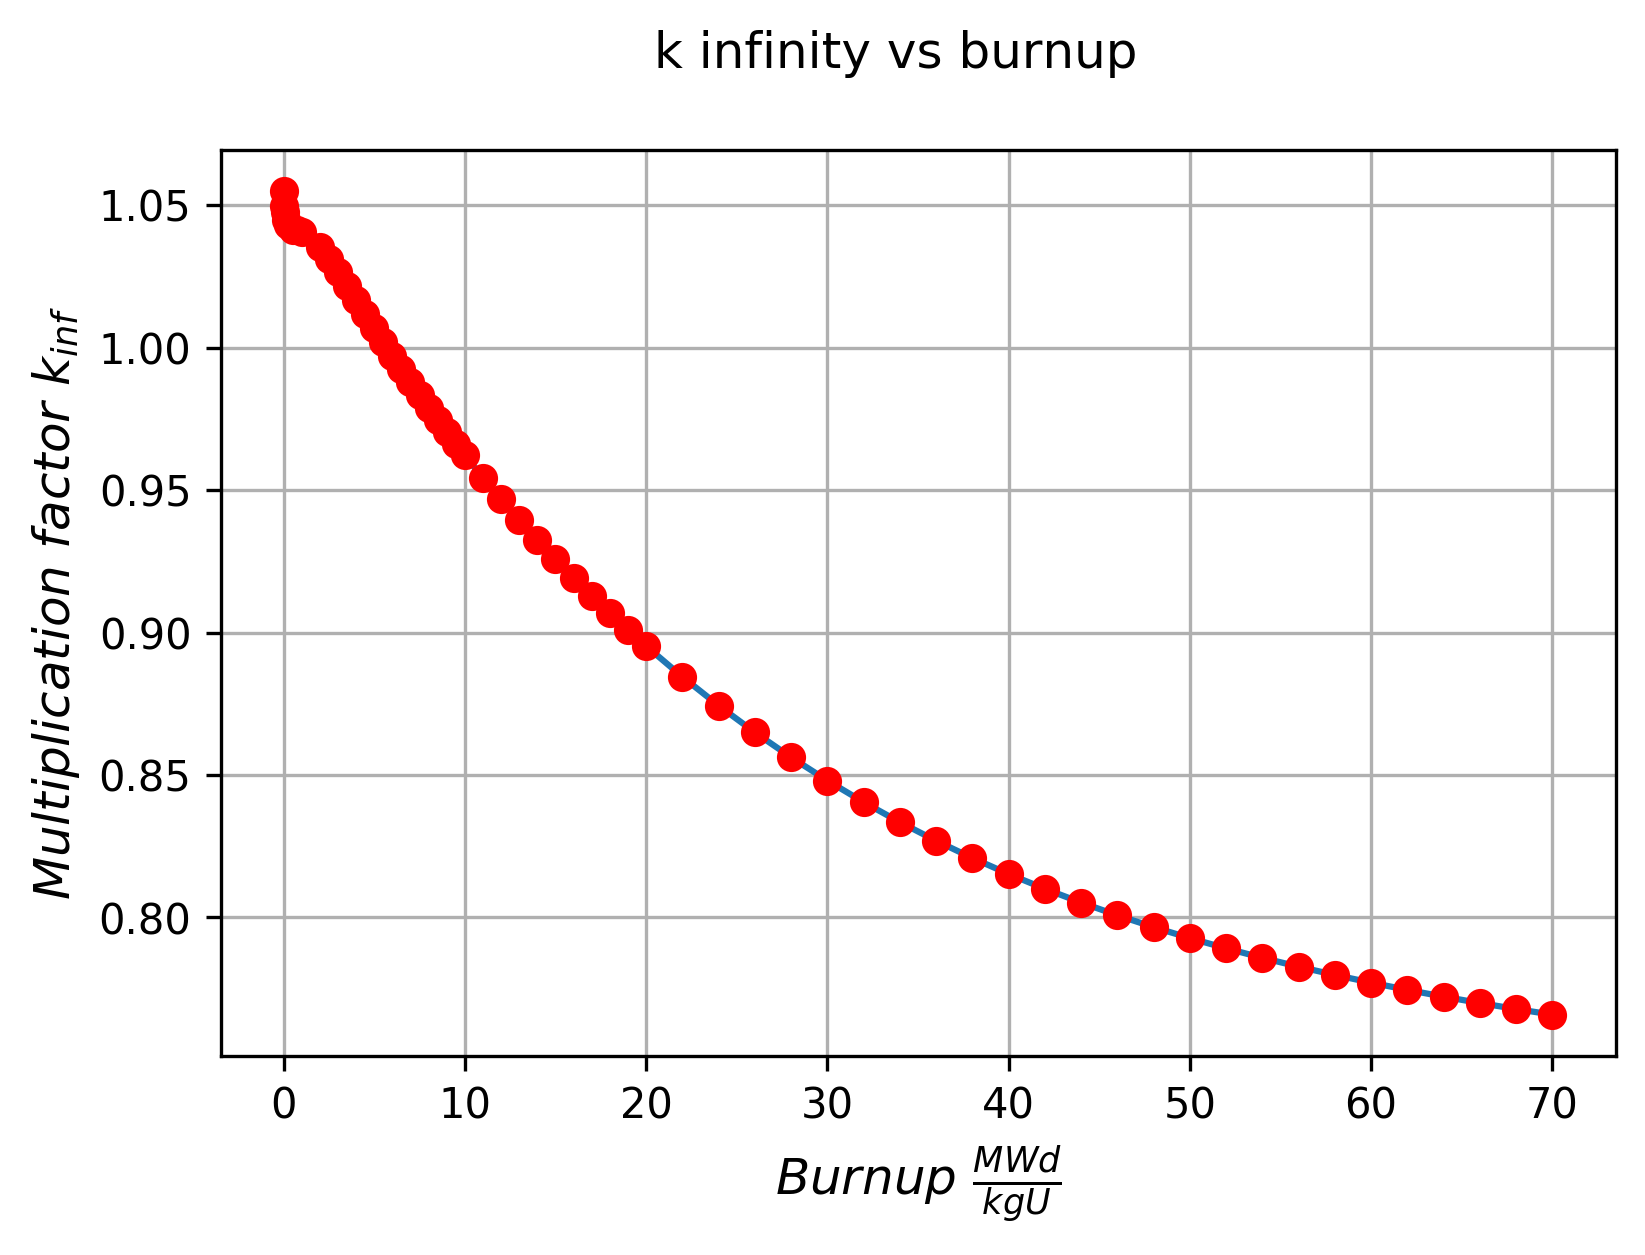

In [27]:
def plot_burnup_vs_kinf(data: Dict)-> Image:
    x_val = [x[0]/1000 for x in data]
    y_val = [x[1] for x in data]
    
    fig = plt.figure()
    plt.grid()
    plt.plot(x_val,y_val)
    plt.plot(x_val,y_val,'or')
    plt.suptitle('k infinity vs burnup', fontsize=12)
    plt.xlabel(r'$Burnup \ \frac{MWd}{kgU}$', fontsize=12)
    plt.ylabel(r'$Multiplication \ factor \ k_{inf}$', fontsize=12)
    filename = 'kinf_vs_burnup.png'
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    #plt.show()
    plt.close(fig)
    return Image(filename, width=600, height=600)
    
plot_burnup_vs_kinf(data=burnup_vs_kinf)

In [ ]:
def get_burn_up_step_data(s: str) -> Iterator[Tuple[str, str]]:
    end='.*\n'
    line=[m.end() for m in re.finditer(end, s)]

    pattern = '>\|(BURNUP step (?P<step>\d+).*?)(?=>\|BURNUP step|>\|CGN_PIN_A completed)'
    match=re.compile(pattern, re.MULTILINE|re.DOTALL)
    for m in re.finditer(match, long_str):
        lineno = next(i+1 for i in range(len(line)) if line[i]>m.start(1))
        endno = lineno + len(m.group().splitlines()) - 1
        text = m.group()
        step = m.group('step')
        print(f'lineno start:{lineno: <6} end:{endno: <6} text: {text[:70]} step: {step}')

        yield step, text
        # break
for step, text in get_burn_up_step_data(long_str):
    # print(step, text[:70])
    parse_burnup_vs_kinf(text)

In [30]:
def get_iso_density_per_ring(s: str) -> List[Tuple[str, str, Decimal]]:
    iso_data = []
    for iso in ['Pu239', 'U235', 'Pu241']:
        pattern = (
            '(?<=ISOTOPIC DENSITIES AFTER BURNUP FOR MIXTURE =)\s+?(?P<ring>\d+)\s\(10\*\*24 PARTICLES/CC\)' # look behind and find ISOTOPIC DENSITIES string
            '.*?' # some data
            f'{iso}\s+:[\s=]+(?P<density>[+-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+))' # iso name followed by : and float number
        )
        prog = re.compile(pattern, re.MULTILINE | re.DOTALL)
        for m in re.finditer(prog, s):
            ring = m.group('ring')
            density = Decimal(m.group('density'))
            # print(m.group())
            print(f'iso: {iso: <5} ring: {ring: <2} dens: {density: <10}')
            iso_data.append((iso, ring, density))
    return iso_data

step1 = m.group()
get_iso_density_per_ring(step1)

iso: Pu239 ring: 1  dens: 0.00012674
iso: Pu239 ring: 4  dens: 0.00013909
iso: Pu239 ring: 5  dens: 0.00017788
iso: Pu239 ring: 6  dens: 0.00032068
iso: U235  ring: 1  dens: 0.000010291
iso: U235  ring: 4  dens: 0.0000093689
iso: U235  ring: 5  dens: 0.0000086020
iso: U235  ring: 6  dens: 0.0000083910
iso: Pu241 ring: 1  dens: 0.000042787
iso: Pu241 ring: 4  dens: 0.000048772
iso: Pu241 ring: 5  dens: 0.000063869
iso: Pu241 ring: 6  dens: 0.00011866


[('Pu239', '1', Decimal('0.00012674')),
 ('Pu239', '4', Decimal('0.00013909')),
 ('Pu239', '5', Decimal('0.00017788')),
 ('Pu239', '6', Decimal('0.00032068')),
 ('U235', '1', Decimal('0.000010291')),
 ('U235', '4', Decimal('0.0000093689')),
 ('U235', '5', Decimal('0.0000086020')),
 ('U235', '6', Decimal('0.0000083910')),
 ('Pu241', '1', Decimal('0.000042787')),
 ('Pu241', '4', Decimal('0.000048772')),
 ('Pu241', '5', Decimal('0.000063869')),
 ('Pu241', '6', Decimal('0.00011866'))]

In [ ]:
iso_dens_vs_burnup = {}
for burn_step, burn_data in get_burn_up_step_data(long_str):
    # print(step, text[:70])
    iso_data = get_iso_density_per_ring(burn_data)
    
    burnup = parse_burnup_vs_kinf(burn_data)[0][0]
    print(burnup)
    iso_dens_vs_burnup[burnup] = iso_data

iso_dens_vs_burnup

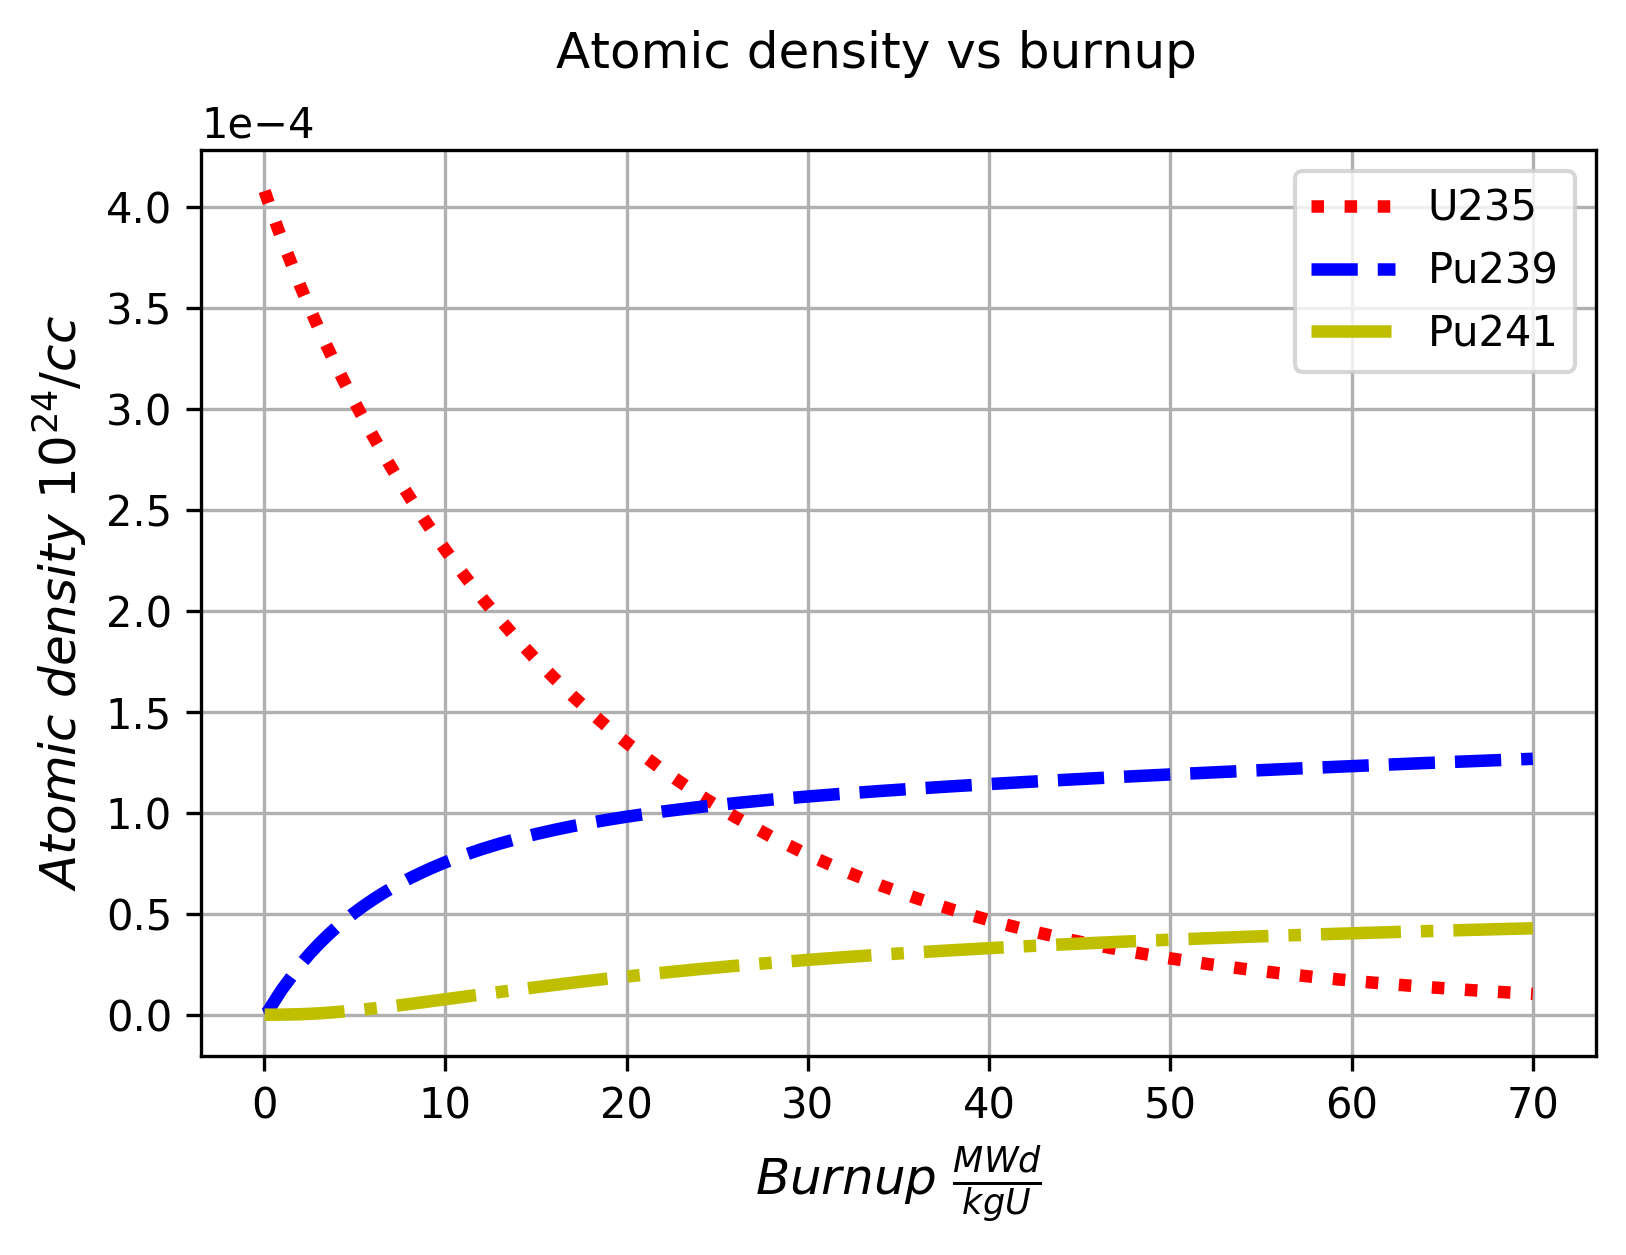

In [34]:
def plot_atomic_dens_vs_burnup(d: Dict) -> Image:
    burnup = [ k/1000 for k in iso_dens_vs_burnup.keys()]
    pu239 = [v[0][2] for _, v in iso_dens_vs_burnup.items() if v[0][0]=='Pu239']
    u235 = [v[4][2] for _, v in iso_dens_vs_burnup.items() if v[4][0]=='U235']
    pu241 = [v[8][2] for _, v in iso_dens_vs_burnup.items() if v[8][0]=='Pu241']
    
    fig = plt.figure()
    plt.plot(burnup,u235, label='U235', linestyle=':', color='r', linewidth=3) # dotted
    plt.plot(burnup,pu239, label='Pu239', linestyle='--', color='b', linewidth=3) # dashed
    plt.plot(burnup,pu241, label='Pu241', linestyle='-.', color='y', linewidth=3) # dashdot
    plt.legend(loc='upper right')
    plt.grid()
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=True))
    plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    plt.suptitle('Atomic density vs burnup', fontsize=12)
    plt.xlabel(r'$Burnup \ \frac{MWd}{kgU}$', fontsize=12)
    plt.ylabel(r'$Atomic \ density \ 10^{24}/cc$', fontsize=12)
    filename = 'atomic_dens_vs_burnup.png'
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    # plt.show()
    plt.close(fig)
    return Image(filename, width=500, height=500)
    
plot_atomic_dens_vs_burnup(d=iso_dens_vs_burnup)